Simulation example

Includes 'Agents'

Schelling's Segregation Model

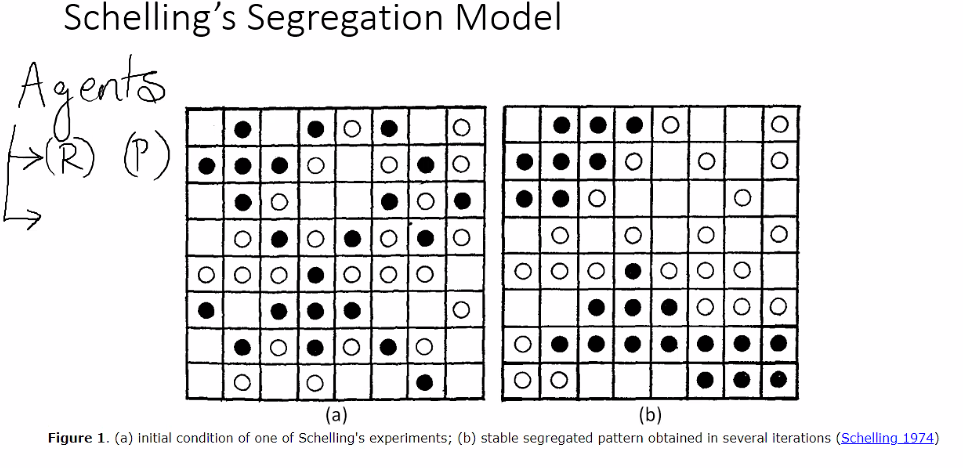

Location is x and y

Black dots poor, white dots rich

Assume 100 total entities

Rich / poor must be considered binary

There are complex terms such as wealth vs education

How do you know when to stop?

Calc distance between dots, can find distance between all agents and their neighbors.

Repeat for all agents there on that simulation.

If, for a black dot, more than 8 neighbors around it, if 4/8 are of same colortype, then STOP

Loop #: 1


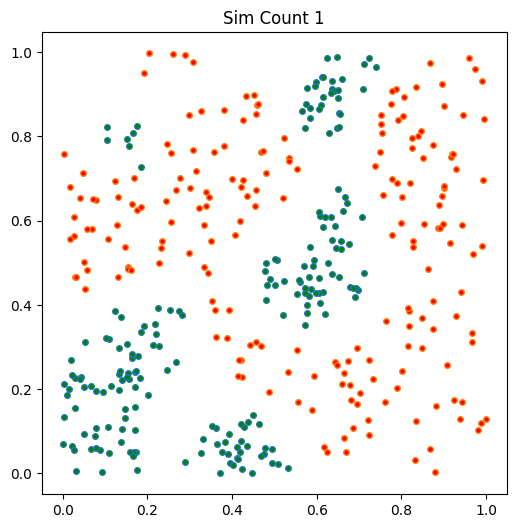

Loop #: 2


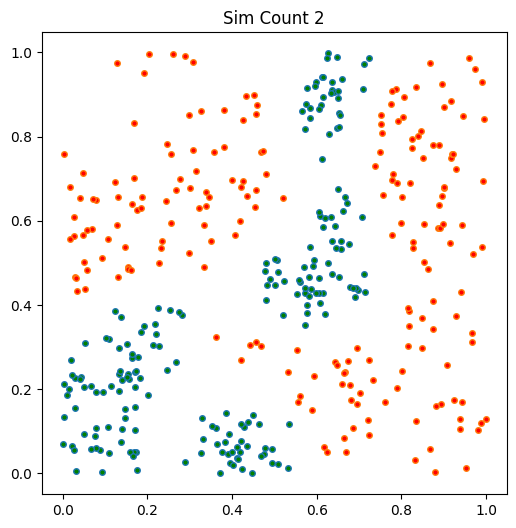

Loop #: 3


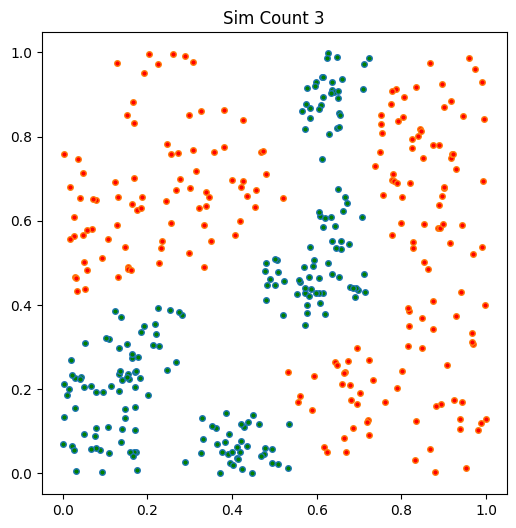

Loop #: 4


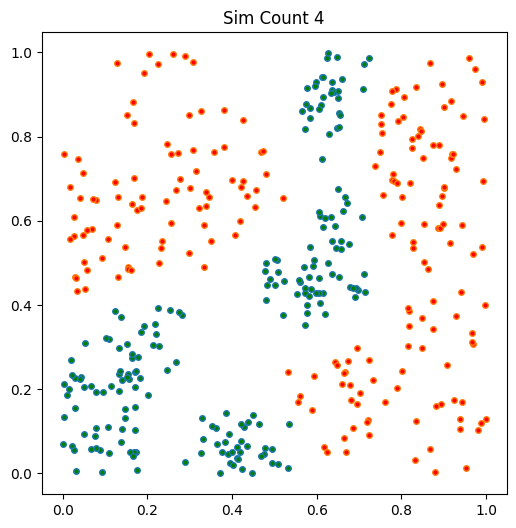

In [15]:
from random import uniform, seed
from math import sqrt
import matplotlib.pyplot as plt

# Define global variables
numRich = 200
numPoor = 200
numNeighbors = 15
reqNeighborType = 10

class Agent:
    def __init__(self, type):
        self.type = type
        self.randloc()  # You don't need to pass the uniform function here

    def randloc(self):
        self.location = uniform(0,1), uniform(0,1)

    def getDistance(self, neighbor):
        # Euclidean distance calculation
        a = (self.location[0] - neighbor.location[0])**2
        b = (self.location[1] - neighbor.location[1])**2
        return sqrt(a+b)
    
    def ishappy(self, agents):
        distances = []
        for agent in agents:
            if self != agent:
                distance = self.getDistance(agent)
                distances.append((distance,agent))
        distances.sort()
        neighbors = [agent for d, agent in distances[:numNeighbors]]
        numSameType = sum([self.type == agent.type for agent in neighbors])
        return (numSameType >= reqNeighborType)

    def updateLoc(self, agents):
        while not self.ishappy(agents):
            self.randloc()

def plotAgents(agents, count):  # You need to pass the agents to this function
    xVal_R, yVal_R = [], []
    xVal_P, yVal_P = [], []

    for agent in agents:
        x,y = agent.location
        if agent.type == 0:
            xVal_R.append(x)
            yVal_R.append(y)
        else:
            xVal_P.append(x)
            yVal_P.append(y)

    fig, ax = plt.subplots(figsize = (6,6))
    ax.plot(xVal_R, yVal_R, 'o', markerfacecolor = 'green', markersize = 4)  # You need to use a number to set the markersize
    ax.plot(xVal_P, yVal_P, 'o', markerfacecolor = 'r', markersize = 4)
    ax.set_title(f"Sim Count {count}")
    plt.show()

seed(10)

count = 0

agents = [Agent(0) for i in range(numRich)]
agents.extend([Agent(1) for i in range(numPoor)])

while True:
    noMove = True
    count+=1
    print(f"Loop #: {count}")
    for agent in agents:
        oldLoc = agent.location
        agent.updateLoc(agents)
        if oldLoc != agent.location:
            noMove = False
    plotAgents(agents, count)  # You need to call this function outside of the loop
    if noMove:
        break
